In [66]:
######################################################################################
# RFM-анализ для успешного сегментирования клиентов с помощью Python
#######################################################################################


######################################################################################
# RFM — это метод, используемый для анализа потребительской ценности.
#
# Он группирует клиентов на основе истории их транзакций:
#
#   * Recency (Давность) — Как давно клиент совершил покупку?
#   * Frequency (Частота) — Как часто они совершают покупки?
#   * Monetary Value (Денежная ценность) — Сколько они тратят?
#
# Полученные сегменты можно упорядочить от наиболее ценных (наибольшая повторяемость, 
# частота и ценность) до наименее ценных (наименьшая повторяемость, частота и ценность). 
# Идентификация наиболее ценных сегментов RFM помогает в извлечении выгоды из случайных 
# взаимосвязей в данных, используемых для этого анализа. 
######################################################################################

In [67]:
# Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [68]:
# Чтение файла CSV с данными - "marketing.csv" 

data = pd.read_csv("sales_data_sample.csv", encoding = 'unicode_escape')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [69]:
# Проверим считанные типы данных и пропущенные значения

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [117]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,S10
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,France,Small,S10
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,France,Medium,S10
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,S10
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,S10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,Euro Shopping Channel,Spain,Small,S72
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,"Oulu Toy Supplies, Inc.",Finland,Medium,S72
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,Euro Shopping Channel,Spain,Medium,S72
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,Alpha Cognac,France,Small,S72


In [70]:
# Размеры матрицы датафрейма (количество строк и столбцов)

data.shape

(2823, 25)

In [71]:
# Вычислим и отобразим предварительно все описательные статистики нашего датафрейма: count - количество элементов, 
# mean - выборочное среднее, # std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [72]:
# Для RFM-анализа нам потребуются определенные данные о каждом из клиентов:
#
#   * ID клиента / имя / компания и т.д. - для их идентификации.
#
#   * Давность (R) - количество дней с момента последней покупки: сколько дней назад была совершена 
#     их последняя покупка? Вычитаем дату последней покупки из сегодняшнего дня, чтобы рассчитать значение давности.
#
#   * Частота (F) - общее количество транзакций: сколько раз клиент совершал покупки в нашем магазине? 
#     Например, если кто-то сделал 10 заказов за определенный период времени, его частота равна 10.
#
#   * Деньги (М) - общая сумма потраченных денег: сколько денег потратил этот клиент? 
#     Просто суммируем деньги от всех транзакций, чтобы получить значение M.

In [73]:
# У нас есть несколько ненужных столбцов - 'ADDRESSLINE1','ADDRESSLINE2', 'POSTALCODE', 'TERRITORY', 'PHONE'. 
# Мы можем удалить их. Мы также можем дискретизировать данные, т.е. вместо того, чтобы использовать 'CITY', 'STATE' 
# может использовать только 'COUNTRY'.
# Мы можем перегруппировать столбец 'PRODUCTCODE', используя только первые три символьных значения. 
# У нас есть 'CUSTOMERNAME', 'CONTACTFIRSTNAME' и 'CONTACTLASTNAME' - здесь, последние 2 столбца, мы можем удалить

In [74]:
# Удаление ненужных столбцов

temp = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'TERRITORY', 'PHONE', 'CITY' , 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME']
data.drop(temp, axis = 1, inplace = True)

In [75]:
# Перегруппировка кода продукта

data['PRODUCTINITIAL'] = data['PRODUCTCODE'].str[:3]
data.drop('PRODUCTCODE', axis = 1, inplace = True)

In [76]:
# Перепроверка столбцов и соответствующих им типов данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  PRODUCTLINE      2823 non-null   object 
 11  MSRP             2823 non-null   int64  
 12  CUSTOMERNAME     2823 non-null   object 
 13  COUNTRY          2823 non-null   object 
 14  DEALSIZE         2823 non-null   object 
 15  PRODUCTINITIAL   2823 non-null   object 
dtypes: float64(2), int64(7), object(7)
memory usage: 353.0+ KB


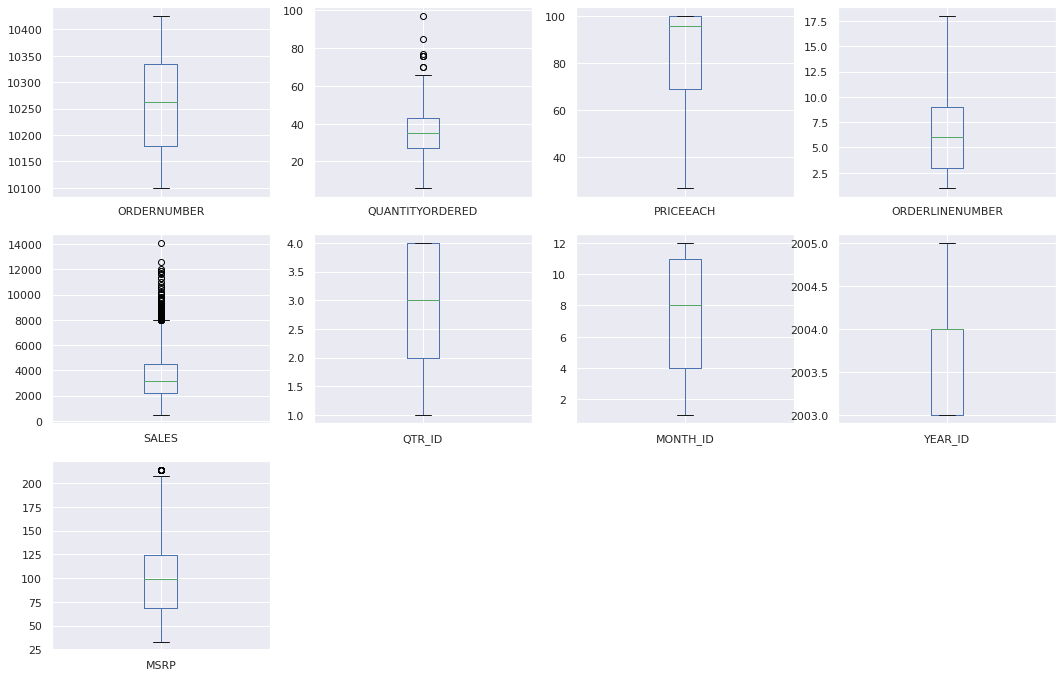

In [77]:
# Теперь построим графики данных, для получения большей информации (boxplot служит той же цели, что и построчная гистограмма, но
# тем не менее, этот график помогает точно определить медиану, 25-й и 75-й персентили X и Y)

plt.rcParams['figure.figsize'] = [18, 16]
data.plot(kind = "box", subplots = True, layout = (4, 4), sharex = False, sharey = False)
plt.show()

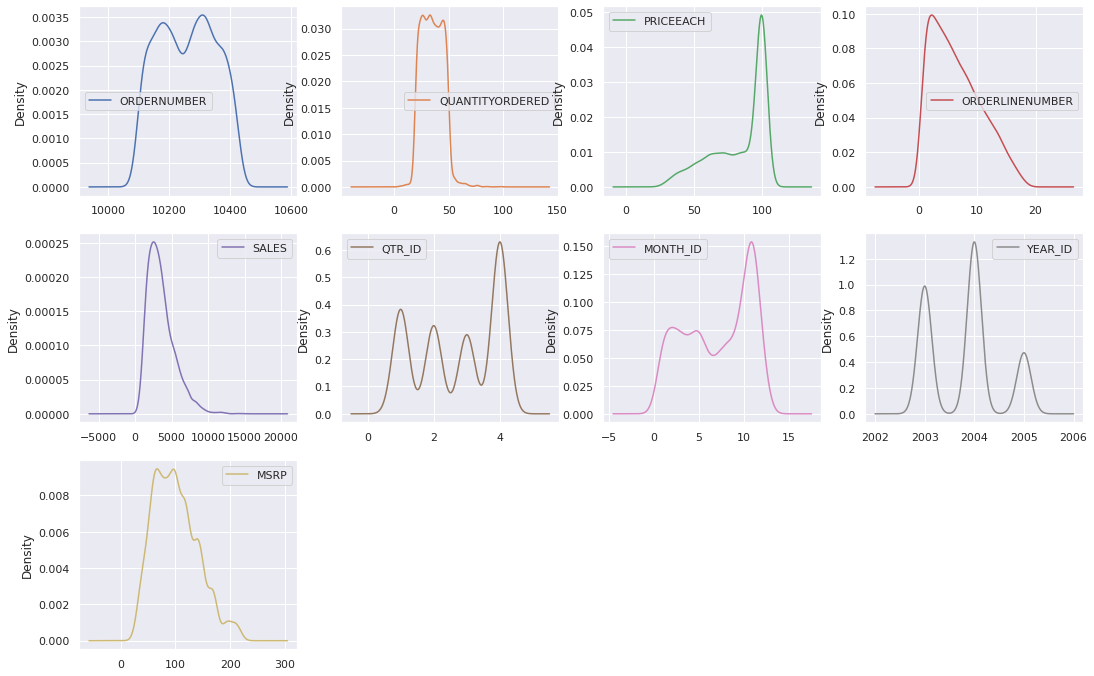

In [78]:
# Построим функции плотности распределения для наших характеристик

plt.rcParams['figure.figsize'] = [18, 16]
data.plot(kind = "density", subplots = True, layout = (4, 4), sharex = False, sharey = False)
plt.show()

In [79]:
# Из полученных графиков видно, что:

#    * Большая часть данных за 2003, 2004 год ('YEAR_ID'). В 4-м годовом квартале больше всего продаж: 4>1>2>3 
#    * Большая часть продаж приходится на определенный ценовой диапазон. Но у нас есть некоторые отклонения в 'SALES' и 'QUANTITYORDERED'
#    * У нас есть асимметричные переменные, такие как 'PRICEEACH', 'ORDERLINENUMBER'
#    * У нас есть переменные с высокой дисперсией, такие как 'PRICEEACH', 'ORDERLINENUMBER' и 'MSRP'

In [80]:
# Детальный анализ данных
# Проверка нулевых значений

data.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
PRODUCTINITIAL     0
dtype: int64

In [81]:
# Проверка уникальных значений

data.nunique()

ORDERNUMBER         307
QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
CUSTOMERNAME         92
COUNTRY              19
DEALSIZE              3
PRODUCTINITIAL        8
dtype: int64

In [82]:
# Проверка дубликатов в значениях

data[data.duplicated(keep=False)]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL


In [83]:
# Замечания по данным:

#   * У нас нет дубликатов в значениях
#   * У нас нет пропущенных значений
#   * У нас есть 92 уникальных клиента ('CUSTOMERNAME'), для которых мы проведем RFM-анализ

In [84]:
# Определим количество всех уникальных статусов заказа товара

data['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

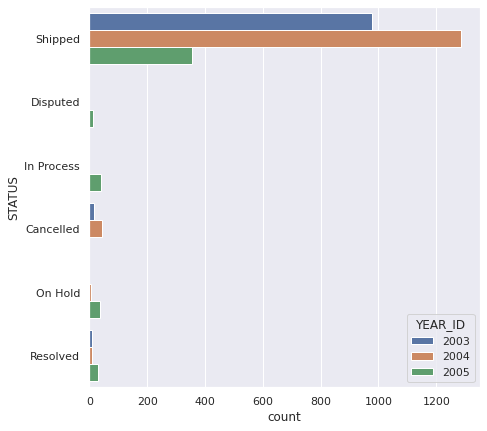

In [85]:
# Диаграмма - статус заказа и количество по годам (2003-2005 гг.)

sns.set(rc={'figure.figsize':(7, 7)})
sns.countplot(y = 'STATUS', data = data, hue = 'YEAR_ID');

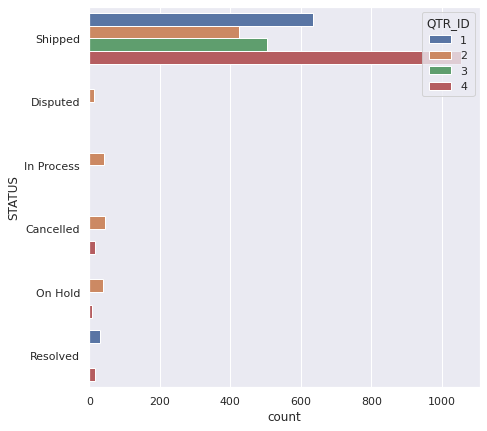

In [86]:
# Диаграмма - статус заказа и количество совокупно по всем кварталам (за 2003-2005 гг.)

sns.set(rc={'figure.figsize':(7, 7)})
sns.countplot(y = 'STATUS', data = data, hue = 'QTR_ID');

In [87]:
# У нас есть 'Disputed', 'In Process', 'On Hold' статусы заказов во 2-м квартале 2005 года
# Также нам нужно уточнить, означает ли 'Resolved' - 'Shipped' или нет?

In [88]:
# Сравнение продаж за каждый год (по кварталам)

data1 = data.groupby(['YEAR_ID','QTR_ID']).agg({'SALES': lambda x: x.sum()})
print(data1.info())
print('****************************************************************************')
data1.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, (2003, 1) to (2005, 2)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SALES   10 non-null     float64
dtypes: float64(1)
memory usage: 327.0 bytes
None
****************************************************************************


SALES
YEAR_ID QTR_ID            
2003    1        445094.69
        2        562365.22
        3        649514.54
        4       1860005.09
2004    1        833730.68

In [89]:
data1.reset_index(inplace = True)
data1.head()

,YEAR_ID,QTR_ID,SALES
0,2003,1,445094.69
1,2003,2,562365.22
2,2003,3,649514.54
3,2003,4,1860005.09
4,2004,1,833730.68


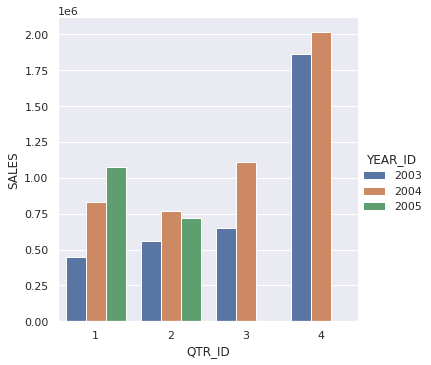

In [90]:
# Диаграмма продаж 'SALES' по всем годовым кварталам за период 2003-2005 гг. 

sns.factorplot(y = 'SALES', x = 'QTR_ID', data = data1, kind = "bar", hue = 'YEAR_ID');

In [91]:
# RFM-анализ

# Для RFM-анализа нам нужны только столбца: 'CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE' and 'SALES'

In [92]:
# Размер нашего нового датафрейма

temp = ['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
RFM_data = data[temp]
RFM_data.shape

(2823, 4)

In [93]:
RFM_data.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2/24/2003 0:00,2871.00
1,Reims Collectables,10121,5/7/2003 0:00,2765.90
2,Lyon Souveniers,10134,7/1/2003 0:00,3884.34
3,Toys4GrownUps.com,10145,8/25/2003 0:00,3746.70
4,Corporate Gift Ideas Co.,10159,10/10/2003 0:00,5205.27


In [99]:
# В датасете последний заказ был сделан 31 мая 2005 года, для расчета давности мы использовали его в качестве даты 
# для функции NOW.

RFM_data['ORDERDATE'] = pd.to_datetime(RFM_data['ORDERDATE'])
RFM_data['ORDERDATE'].max()

Timestamp('2005-05-31 00:00:00')

In [103]:
# Создаём нашу RFM-таблицу

NOW = dt.datetime(2005, 5, 31)

RFM_table = RFM_data.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (NOW - x.max()).days, # Давность
                                                'ORDERNUMBER': lambda x: len(x.unique()), # Частота
                                                'SALES': lambda x: x.sum()})    # Денежная ценность 

RFM_table['ORDERDATE'] = RFM_table['ORDERDATE'].astype(int)

RFM_table.rename(columns = {'ORDERDATE': 'recency', 
                          'ORDERNUMBER': 'frequency',
                          'SALES': 'monetary_value'}, inplace = True)

In [104]:
# Теперь у нас есть значения RFM в отношении каждого клиента

RFM_table.head()

,recency,frequency,monetary_value
CUSTOMERNAME,,,
"AV Stores, Co.",195,3,157807.81
Alpha Cognac,64,3,70488.44
Amica Models & Co.,264,2,94117.26
"Anna's Decorations, Ltd",83,4,153996.13
Atelier graphique,187,3,24179.96


In [106]:
# RFM-группировка
#
# Теперь поработаем с показателем RFM. Для его расчета мы использовали квантили — составление четырех равных частей на основе 
# доступных значений — для расчета показателя RFM

quantiles = RFM_table.quantile(q = [0.25, 0.5, 0.75])
quantiles

,recency,frequency,monetary_value
0.25,80.25,2.0,70129.4325
0.50,185.00,3.0,86522.6100
0.75,229.25,3.0,120575.8750


In [107]:
# Преобразование квантилей в словарь

quantiles = quantiles.to_dict()
quantiles 

{'recency': {0.25: 80.25, 0.5: 185.0, 0.75: 229.25},
 'frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 3.0},
 'monetary_value': {0.25: 70129.4325, 0.5: 86522.61, 0.75: 120575.875}}

In [108]:
# RFM-сегментация

RFM_Segment = RFM_table.copy()

In [109]:
# Аргументы функции (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def R_Class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Аргументы функции (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def FM_Class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [110]:
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency', quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency', quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value', quantiles,))

In [118]:
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) + RFM_Segment.F_Quartile.map(str) + RFM_Segment.M_Quartile.map(str)

In [119]:
RFM_Segment.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",195,3,157807.81,2,2,4,224
Alpha Cognac,64,3,70488.44,4,2,2,422
Amica Models & Co.,264,2,94117.26,1,1,3,113
"Anna's Decorations, Ltd",83,4,153996.13,3,4,4,344
Atelier graphique,187,3,24179.96,2,2,1,221


In [113]:
RFM_Segment.describe()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile
count,92.000000,92.000000,92.000000,92.00000,92.000000,92.00000
mean,181.826087,3.336957,109050.313587,2.50000,2.163043,2.50000
std,131.420524,2.924986,110308.612808,1.12416,1.121980,1.12416
min,0.000000,1.000000,9129.350000,1.00000,1.000000,1.00000
25%,80.250000,2.000000,70129.432500,1.75000,1.000000,1.75000
50%,185.000000,3.000000,86522.610000,2.50000,2.000000,2.50000
75%,229.250000,3.000000,120575.875000,3.25000,2.000000,3.25000
max,508.000000,26.000000,912294.110000,4.00000,4.000000,4.00000


In [114]:
RFM_Segment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, AV Stores, Co. to giftsbymail.co.uk
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         92 non-null     int64  
 1   frequency       92 non-null     int64  
 2   monetary_value  92 non-null     float64
 3   R_Quartile      92 non-null     int64  
 4   F_Quartile      92 non-null     int64  
 5   M_Quartile      92 non-null     int64  
 6   RFMClass        92 non-null     object 
dtypes: float64(1), int64(5), object(1)
memory usage: 5.8+ KB


In [ ]:
# RFM-сегментация позволяет нам ответить на следующие бизнес-вопросы:
#
#   * Кто наши лучшие клиенты?
#   * Какие клиенты находятся на пороге оттока? 
#   * Кто является потерянными клиентами, которым не нужно уделять много внимания? 
#   * Кто наши постоянные клиенты? 
#   * Каких клиентов мы должны удержать? 
#   * Кто имеет потенциал для преобразования в более прибыльных клиентов? 
#   * Какая группа клиентов с наибольшей вероятностью откликнется на нашу текущую маркетинговую кампанию?

In [115]:
# Вопрос: Кто мои лучшие клиенты? (по величине RFMClass = 444)

RFM_Segment[RFM_Segment['RFMClass'] == '444'].sort_values('monetary_value', ascending = False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
La Rochelle Gifts,0,4,180124.90,4,4,4,444
The Sharp Gifts Warehouse,39,4,160010.27,4,4,4,444
Souveniers And Things Co.,2,4,151570.98,4,4,4,444


In [116]:
# Вопрос: Какие клиенты находятся на пороге оттока?
# Клиенты, ценность которых в последнее время невелика

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending = False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Land of Toys Inc.,197,4,164069.44,2,4,4,244
"AV Stores, Co.",195,3,157807.81,2,2,4,224
"Saveley & Henriot, Co.",455,3,142874.25,1,2,4,124
Rovelli Gifts,200,3,137955.72,2,2,4,224
Online Diecast Creations Co.,208,3,131685.30,2,2,4,224


In [169]:
# Вопрос: Кто такие потерянные клиенты?
# Клиенты, у которых недавность, частота, а также денежная стоимость невелики

RFM_Segment[RFM_Segment['RFMClass'] == '111'].sort_values('recency',ascending = False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"Men 'R' US Retailers, Ltd.",508,2,48048.46,1,1,1,111
"Double Decker Gift Stores, Ltd",495,2,36019.04,1,1,1,111
West Coast Collectables Co.,488,2,46084.64,1,1,1,111
Signal Collectibles Ltd.,476,2,50218.51,1,1,1,111
Daedalus Designs Imports,465,2,69052.41,1,1,1,111


In [170]:
# Вопрос: Кто наши лояльные клиенты?
# Клиенты с высокой частотной ценностью

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending = False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
"Australian Collectors, Co.",183,5,200995.41,3,4,4,344
Muscle Machine Inc,181,4,197736.94,3,4,4,344
La Rochelle Gifts,0,4,180124.90,4,4,4,444
